In [2]:
#importamos librerías y herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta
# gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 # modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
from catboost import CatBoostRegressor
# metricas
import sklearn.metrics as metrics
# hiperparametrizado
from sklearn.model_selection import GridSearchCV
# quitar alertas
import warnings
warnings.filterwarnings("ignore")

In [56]:
df_entrenar = pd.read_csv('data/viviendas_regresion_basica.csv')

In [49]:
df_entrenar

,id_vivienda,superficie,num_hab,distancia,fecha_const,parking,premiada,tam_buzon,precio,impuestos,vendida
0,viv_1,65.0,1,7,1991-01-01,ext,0,0.9,166000.0,16600.0,1.0
1,viv_2,97.0,4+,8,1994-01-01,ext,0,1.8,279000.0,27900.0,1.0
2,viv_3,80.0,4+,4,1970-01-01,NaN,0,1.0,233000.0,23300.0,1.0
3,viv_4,73.0,1,1,1983-01-01,ext,0,1.1,182000.0,18200.0,1.0
4,viv_5,86.0,2,8,1999-01-01,NaN,0,1.2,210000.0,21000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6998,viv_6999,128.0,3,5,1979-01-01,NaN,0,1.3,317000.0,31700.0,0.0
6999,viv_7000,77.0,4+,7,1996-01-01,ext,0,1.5,177000.0,17700.0,0.0
7000,viv_7001,128.0,3,6,2022-01-01,ext,0,0.7,NaN,NaN,NaN
7001,viv_7002,93.0,4+,9,1988-01-01,NaN,0,1.5,NaN,NaN,NaN


In [5]:
df_entrenar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_vivienda  7003 non-null   object 
 1   superficie   6993 non-null   float64
 2   num_hab      7003 non-null   object 
 3   distancia    7003 non-null   int64  
 4   fecha_const  7003 non-null   object 
 5   parking      4764 non-null   object 
 6   premiada     7003 non-null   int64  
 7   tam_buzon    7003 non-null   float64
 8   precio       7000 non-null   float64
 9   impuestos    7000 non-null   float64
 10  vendida      7000 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 601.9+ KB


In [13]:
df_entrenar.isnull().sum()

id_vivienda       0
superficie        0
num_hab           0
distancia         0
fecha_const       0
parking        2239
premiada          0
tam_buzon         0
precio            3
impuestos         3
vendida           3
dtype: int64

In [57]:
df_entrenar.dropna(subset=['superficie'],inplace=True)

In [15]:
for i in df_entrenar:
    print(df_entrenar[i].unique())

['viv_1' 'viv_2' 'viv_3' ... 'viv_7001' 'viv_7002' 'viv_7003']
[ 65.  97.  80.  73.  86.  95. 110. 126.  98.  75. 124. 114. 100.  82.
  81. 125. 101. 120. 104.  99.  70.  91.  62. 116. 109. 119.  93. 127.
 108. 122. 118. 123. 129.  72. 115.  68.  90.  85.  69.  83.  61. 106.
  88.  71.  84. 111.  64.  76.  78.  63. 107.  60. 105. 130.  67.  79.
  92. 117. 102.  96.  94. 103.  66.  74.  87.  77. 112.  89. 113. 121.
 128.]
['1' '4+' '2' '3']
[ 7  8  4  1  5 10  3  2  6  9]
['1991-01-01' '1994-01-01' '1970-01-01' '1983-01-01' '1999-01-01'
 '1978-01-01' '1997-01-01' '2002-01-01' '1976-01-01' '2000-01-01'
 '2021-01-01' '1989-01-01' '1965-01-01' '1979-01-01' '1981-01-01'
 '2010-01-01' '2001-01-01' '1982-01-01' '1998-01-01' '2012-01-01'
 '1995-01-01' '1969-01-01' '1984-01-01' '1986-01-01' '1993-01-01'
 '1987-01-01' '2003-01-01' '1996-01-01' '1992-01-01' '2015-01-01'
 '2023-01-01' '1973-01-01' '1968-01-01' '1972-01-01' '2020-01-01'
 '2016-01-01' '2009-01-01' '1977-01-01' '1971-01-01' '2007-01-

## Solo me interesa las casas _Vendidas_ ya que al ser vendida, tiene un precio que me interesa

In [58]:
df_entrenar.drop(df_entrenar[df_entrenar['vendida']==0].index, inplace=True)

In [59]:
df_entrenar = df_entrenar.reset_index()
df_entrenar.shape

(4993, 12)

In [ ]:
df_entrenar.info()

In [68]:
df_predecir = df_entrenar.tail(3)

In [74]:
df_predecir

,index,id_vivienda,superficie,num_hab,distancia,fecha_const,parking,premiada,tam_buzon,precio,impuestos,vendida
4990,7000,viv_7001,128.0,3,6,2022-01-01,ext,0,0.7,NaN,NaN,NaN
4991,7001,viv_7002,93.0,4+,9,1988-01-01,NaN,0,1.5,NaN,NaN,NaN
4992,7002,viv_7003,68.0,2,3,1972-01-01,NaN,0,0.7,NaN,NaN,NaN


In [69]:
df_entrenar1 = df_entrenar.copy()

In [70]:
df_entrenar2 = df_entrenar1.head(4990)

In [73]:
df_entrenar2

,index,id_vivienda,superficie,num_hab,distancia,fecha_const,parking,premiada,tam_buzon,precio,impuestos,vendida
0,0,viv_1,65.0,1,7,1991-01-01,ext,0,0.9,166000.0,16600.0,1.0
1,1,viv_2,97.0,4+,8,1994-01-01,ext,0,1.8,279000.0,27900.0,1.0
2,2,viv_3,80.0,4+,4,1970-01-01,NaN,0,1.0,233000.0,23300.0,1.0
3,3,viv_4,73.0,1,1,1983-01-01,ext,0,1.1,182000.0,18200.0,1.0
4,4,viv_5,86.0,2,8,1999-01-01,NaN,0,1.2,210000.0,21000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4985,6987,viv_6988,130.0,3,7,1996-01-01,NaN,0,1.9,286000.0,28600.0,1.0
4986,6988,viv_6989,120.0,3,8,2022-01-01,ext,0,1.0,299000.0,29900.0,1.0
4987,6989,viv_6990,76.0,4+,7,2006-01-01,ext,0,0.5,245000.0,24500.0,1.0
4988,6992,viv_6993,128.0,3,8,2022-01-01,NaN,0,1.3,276000.0,27600.0,1.0


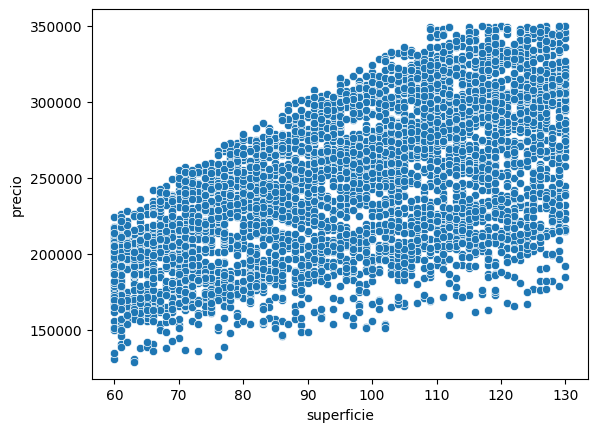

In [75]:
sns.scatterplot(data=df_entrenar2, x='superficie', y='precio')
plt.show()

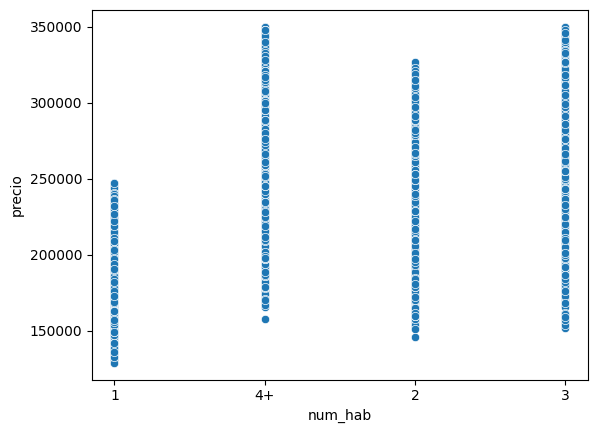

In [76]:
sns.scatterplot(data=df_entrenar2, x='num_hab', y='precio')
plt.show()

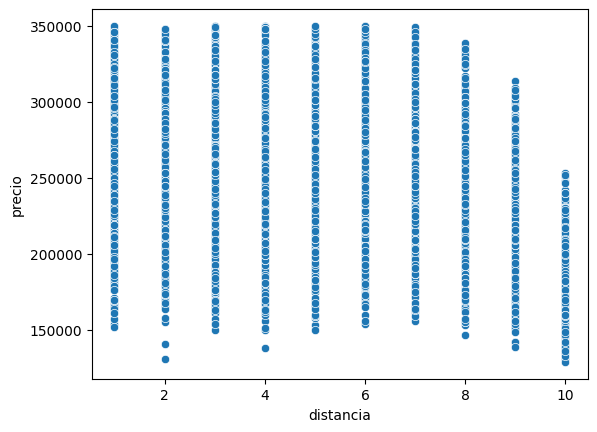

In [77]:
sns.scatterplot(data=df_entrenar2, x='distancia', y='precio')
plt.show()

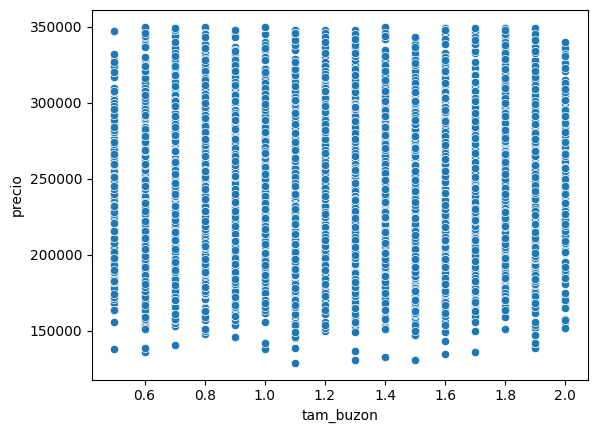

In [78]:
sns.scatterplot(data=df_entrenar2, x='tam_buzon', y='precio')
plt.show()

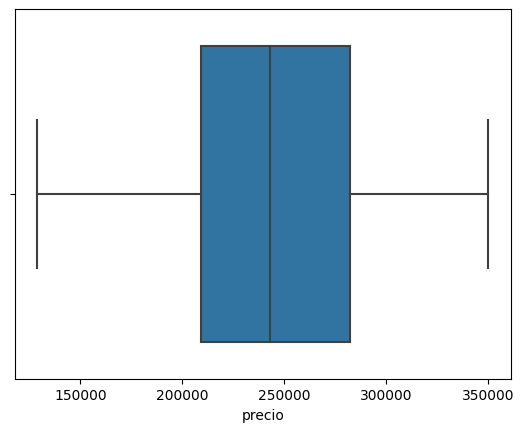

In [79]:
sns.boxplot(data=df_entrenar2, x='precio')
plt.show()

In [80]:
df_entrenar2['parking']=df_entrenar['parking'].fillna('sin')
df_predecir['parking']=df_predecir['parking'].fillna('sin')

In [82]:
df_entrenar2

,index,id_vivienda,superficie,num_hab,distancia,fecha_const,parking,premiada,tam_buzon,precio,impuestos,vendida
0,0,viv_1,65.0,1,7,1991-01-01,ext,0,0.9,166000.0,16600.0,1.0
1,1,viv_2,97.0,4+,8,1994-01-01,ext,0,1.8,279000.0,27900.0,1.0
2,2,viv_3,80.0,4+,4,1970-01-01,sin,0,1.0,233000.0,23300.0,1.0
3,3,viv_4,73.0,1,1,1983-01-01,ext,0,1.1,182000.0,18200.0,1.0
4,4,viv_5,86.0,2,8,1999-01-01,sin,0,1.2,210000.0,21000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4985,6987,viv_6988,130.0,3,7,1996-01-01,sin,0,1.9,286000.0,28600.0,1.0
4986,6988,viv_6989,120.0,3,8,2022-01-01,ext,0,1.0,299000.0,29900.0,1.0
4987,6989,viv_6990,76.0,4+,7,2006-01-01,ext,0,0.5,245000.0,24500.0,1.0
4988,6992,viv_6993,128.0,3,8,2022-01-01,sin,0,1.3,276000.0,27600.0,1.0


In [83]:
id_viv = df_entrenar2['id_vivienda']
id_viv_predecir = df_predecir['id_vivienda']

In [84]:
del(df_entrenar2['id_vivienda'])
del(df_predecir['id_vivienda'])

In [88]:
df_entrenar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4990 non-null   int64  
 1   superficie   4990 non-null   int64  
 2   num_hab      4990 non-null   object 
 3   distancia    4990 non-null   int64  
 4   fecha_const  4990 non-null   object 
 5   parking      4990 non-null   object 
 6   premiada     4990 non-null   int64  
 7   tam_buzon    4990 non-null   float64
 8   precio       4990 non-null   float64
 9   impuestos    4990 non-null   float64
 10  vendida      4990 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 429.0+ KB


In [86]:
df_entrenar2['superficie'] = df_entrenar2['superficie'].astype('int64')
df_predecir['superficie'] = df_predecir['superficie'].astype('int64')

In [89]:
df_entrenar2['num_hab'] = df_entrenar2['num_hab'].apply(lambda x: 4 if x == '4+' else int(x))
df_predecir['num_hab'] = df_predecir['num_hab'].apply(lambda x: 4 if x == '4+' else int(x))

In [90]:
df_entrenar2['num_hab'].unique()

array([1, 4, 2, 3], dtype=int64)

In [91]:
df_entrenar3= df_entrenar2.copy()
df_predecir1 = df_predecir.copy()

In [92]:
df_entrenar3['fecha_const'] = pd.to_datetime(df_entrenar3['fecha_const'])
df_predecir1['fecha_const'] = pd.to_datetime(df_predecir1['fecha_const'])

In [93]:
hoy =pd.Timestamp(dt.date.today())
hoy

Timestamp('2024-06-10 00:00:00')

In [98]:
df_entrenar3["edad"]= round((hoy-df_entrenar3["fecha_const"])/ np.timedelta64(1,'m')/(1440*365),0)
df_predecir1["edad"]= round((hoy-df_predecir1["fecha_const"])/ np.timedelta64(1,'m')/(1440*365),0)

In [99]:
df_entrenar3.head()

,index,superficie,num_hab,distancia,fecha_const,parking,premiada,tam_buzon,precio,impuestos,vendida,edad
0,0,65,1,7,1991-01-01,ext,0,0.9,166000.0,16600.0,1.0,33.0
1,1,97,4,8,1994-01-01,ext,0,1.8,279000.0,27900.0,1.0,30.0
2,2,80,4,4,1970-01-01,sin,0,1.0,233000.0,23300.0,1.0,54.0
3,3,73,1,1,1983-01-01,ext,0,1.1,182000.0,18200.0,1.0,41.0
4,4,86,2,8,1999-01-01,sin,0,1.2,210000.0,21000.0,1.0,25.0


In [100]:
df_predecir1

,index,superficie,num_hab,distancia,fecha_const,parking,premiada,tam_buzon,precio,impuestos,vendida,edad
4990,7000,128,3,6,2022-01-01,ext,0,0.7,NaN,NaN,NaN,2.0
4991,7001,93,4,9,1988-01-01,sin,0,1.5,NaN,NaN,NaN,36.0
4992,7002,68,2,3,1972-01-01,sin,0,0.7,NaN,NaN,NaN,52.0


In [101]:
list_to_delete = ['fecha_const','vendida']
for i in list_to_delete:
  del(df_entrenar3[i])
  del(df_predecir1[i])